In [7]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from energy_data_enricher.models import *
from energy_data_enricher.utils import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
#load toy_data.csv as torch tensor
data = torch.from_numpy(pd.read_csv('data/toy_data.csv', delimiter=',', dtype=np.float32).values)
data = data[:, :2]


In [14]:
data

tensor([[ 0.2070, -1.1312],
        [-1.3756,  0.9238],
        [-1.4012,  0.9246],
        ...,
        [-1.2046,  0.8554],
        [ 1.2780, -0.6962],
        [-0.0379,  0.6449]])

In [17]:
train_data, test_data = data[0:800], data[800:1000]

Vanilla KDE

In [125]:
vanillaKDE = VanillaKernelDensityEstimator(mu=train_data,sigma=0.1)

In [126]:
vanillaKDE.log_likelihood(test_data)

tensor([-1.4290, -2.6393,  0.7458,  0.7484,  0.7285, -0.6523, -4.1838, -3.7454,
        -0.7261, -2.5395, -8.3250, -2.7933,  0.6220, -1.6126, -4.5268,  0.4311,
        -1.9217, -3.8289, -3.2461, -2.3652,  0.7666, -2.5937,  0.4672, -9.3429,
         0.4596, -2.6818,  0.7803, -2.0242, -3.1560, -3.4542, -1.9513, -1.8015,
        -3.1710, -2.0639, -3.0777, -1.5044, -1.4356, -0.4213, -0.6357, -3.3445,
         0.7640, -3.3957, -2.3065, -3.1607,  0.7266,  0.5405, -1.2484, -2.2635,
        -0.5183, -4.4231,  0.5729, -1.4091, -3.9792, -1.9944, -0.8716, -1.5337,
        -3.2431, -3.7889,  0.6142, -4.1570, -3.8586,  0.7031, -2.8168, -2.2260,
        -2.2928, -6.4331,  0.6833, -0.5732,  0.7012, -1.4665,  0.7737, -3.1454,
         0.7168,  0.7807, -2.5254, -3.1326,  0.6075, -1.2779, -3.2567, -0.6653,
        -4.2498, -3.7071, -3.1394,  0.7960, -0.6824, -6.3632, -1.8343, -5.2914,
        -2.5214,  0.6604, -7.1613, -1.8326, -1.4095,  0.7832, -1.5658,  0.7641,
        -4.0026, -3.6997, -3.2678, -3.51

In [127]:
samples = vanillaKDE.sample(num_samples=1000)

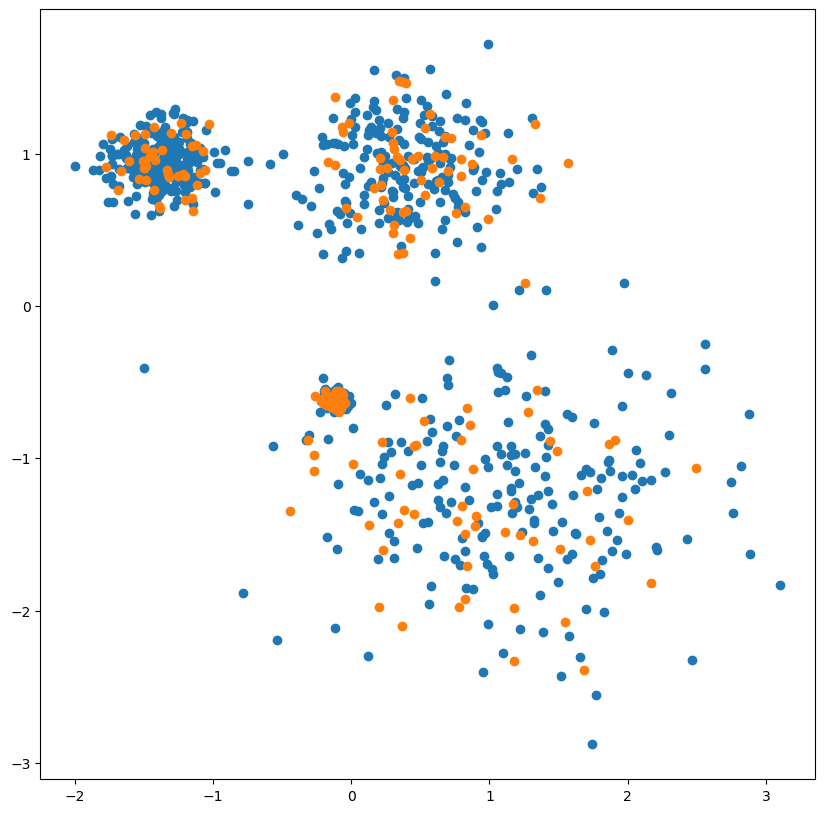

In [128]:
#plot the samples and the data
plt.figure(figsize=(10,10))
plt.scatter(train_data[:,0], train_data[:,1], label='train data')
plt.scatter(test_data[:,0], test_data[:,1], label='test data')
# plt.scatter(samples[:,0], samples[:,1], label='samples')

In [129]:
test_data_idx = 1
resp = vanillaKDE.expectation_step(test_data[[test_data_idx]])[0]

In [130]:
resp.sort(descending=True)

torch.return_types.sort(
values=tensor([1.4375e-01, 1.1235e-01, 9.2915e-02, 7.1062e-02, 6.7782e-02, 6.7561e-02,
        5.9389e-02, 5.1930e-02, 4.6567e-02, 4.4450e-02, 4.4274e-02, 2.8924e-02,
        2.2323e-02, 2.1041e-02, 2.0403e-02, 1.1356e-02, 9.7139e-03, 9.0815e-03,
        8.6787e-03, 8.5607e-03, 7.8732e-03, 7.7562e-03, 7.4975e-03, 6.0352e-03,
        4.8965e-03, 3.9726e-03, 3.4895e-03, 2.9012e-03, 2.1526e-03, 1.9649e-03,
        1.5896e-03, 1.3713e-03, 1.0707e-03, 8.9918e-04, 8.9426e-04, 7.2307e-04,
        6.2952e-04, 3.8848e-04, 2.1828e-04, 1.8359e-04, 1.8320e-04, 1.8064e-04,
        1.6819e-04, 1.6298e-04, 1.0772e-04, 8.8406e-05, 7.9850e-05, 4.4602e-05,
        3.6867e-05, 3.4737e-05, 3.4397e-05, 3.4121e-05, 3.3500e-05, 3.0669e-05,
        2.7772e-05, 2.3225e-05, 1.4634e-05, 1.4352e-05, 1.1643e-05, 9.5729e-06,
        8.1872e-06, 7.3985e-06, 7.1285e-06, 6.3673e-06, 5.9161e-06, 5.6706e-06,
        4.4171e-06, 2.8348e-06, 2.6111e-06, 2.4941e-06, 1.9943e-06, 1.5424e-06,
        

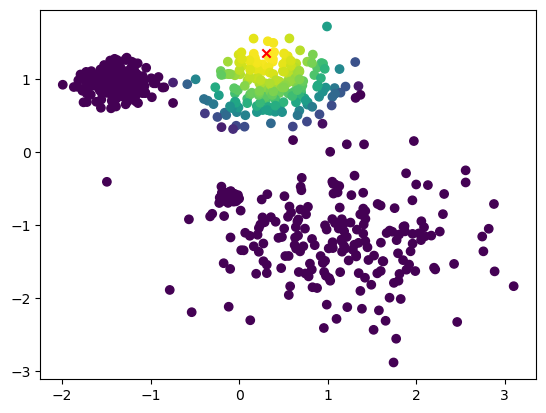

In [131]:
plt.scatter(train_data[:,0], train_data[:,1], label='kernel centers', c=resp.log())
plt.scatter(test_data[test_data_idx,0], test_data[test_data_idx,1], label='test data', c='r', marker='x')

In [132]:
miss_idx = torch.rand(test_data.size())<0.3
test_data_miss = test_data.clone()
test_data_miss[miss_idx] = torch.nan

In [133]:
test_data_miss[[test_data_idx]]

tensor([[0.2996, 1.3512]])

In [134]:
vanillaKDE.impute(test_data_miss[[test_data_idx]], num_steps=2000)

tensor([[0.2996, 1.3512]])

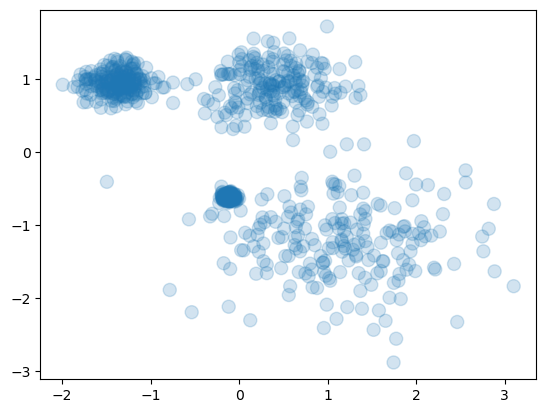

In [135]:
plt.scatter(train_data[:,0], train_data[:,1], label='kernel centers', s=4000*to_sigma(vanillaKDE.sigmatilde)[0], alpha=0.2)

Adaptive KDE

In [137]:
adaptiveKDE = AdaptiveKernelDensityEstimator(mu=train_data,sigma=10)

In [138]:
adaptiveKDE.train(train_data, modified_em=True, verbose=True, verbose_freq=1, leave_one_out=True)

Iteration: 1, Objective Value: -3.62977
Iteration: 2, Objective Value: -3.36962
Iteration: 3, Objective Value: -3.12625
Iteration: 4, Objective Value: -2.75306
Iteration: 5, Objective Value: -2.36663
Iteration: 6, Objective Value: -2.00442
Iteration: 7, Objective Value: -1.63278
Iteration: 8, Objective Value: -1.50303
Iteration: 9, Objective Value: -1.46057
Iteration: 10, Objective Value: -1.43638
Iteration: 11, Objective Value: -1.42013
Iteration: 12, Objective Value: -1.40833
Iteration: 13, Objective Value: -1.39930
Iteration: 14, Objective Value: -1.39206
Iteration: 15, Objective Value: -1.38609
Iteration: 16, Objective Value: -1.38099
Iteration: 17, Objective Value: -1.37638
Iteration: 18, Objective Value: -1.37202
Iteration: 19, Objective Value: -1.36769
Iteration: 20, Objective Value: -1.36344
Iteration: 21, Objective Value: -1.35922
Iteration: 22, Objective Value: -1.35520
Iteration: 23, Objective Value: -1.35146
Iteration: 24, Objective Value: -1.34770
Iteration: 25, Objective 

In [139]:
samples = adaptiveKDE.sample(num_samples=1000)

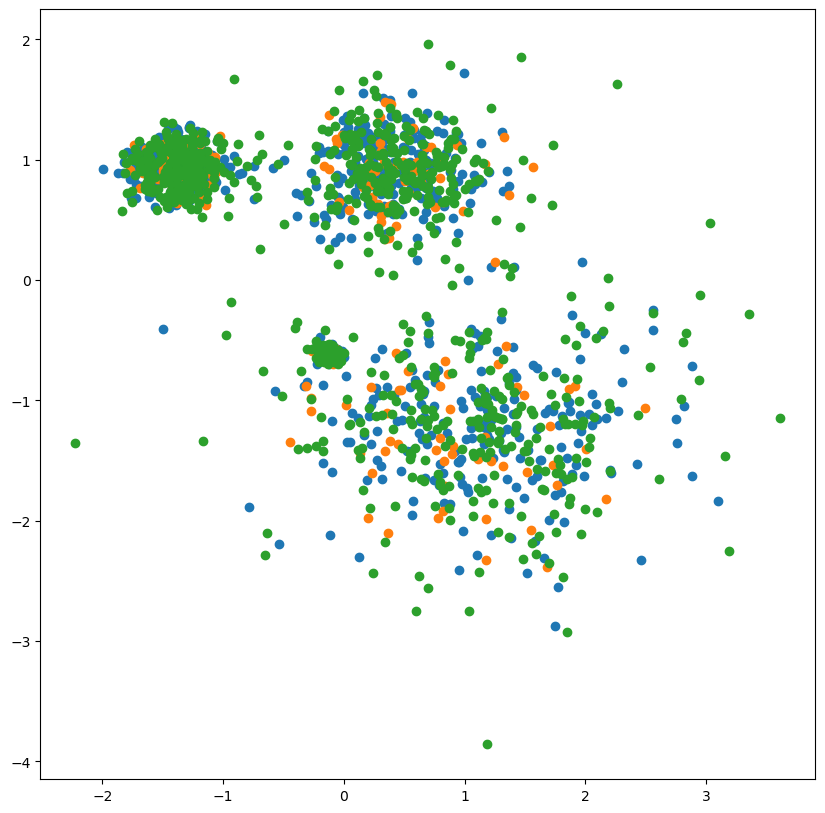

In [140]:
#plot the samples and the data
plt.figure(figsize=(10,10))
plt.scatter(train_data[:,0], train_data[:,1], label='train data')
plt.scatter(test_data[:,0], test_data[:,1], label='test data')
plt.scatter(samples[:,0], samples[:,1], label='samples')

In [141]:
test_data_idx = 5
resp = adaptiveKDE.expectation_step(test_data[[test_data_idx]])[0]

(array([ 1.,  0.,  1.,  4.,  1.,  6., 10., 11., 22., 50., 68.,  5., 14.,
        19., 24., 54., 89., 47., 25., 76., 66., 43., 47., 56., 27., 10.,
        18.,  0.,  1.,  5.]),
 array([-9.019206  , -8.693455  , -8.367703  , -8.041952  , -7.716201  ,
        -7.3904495 , -7.064698  , -6.738947  , -6.4131956 , -6.0874443 ,
        -5.761693  , -5.435941  , -5.11019   , -4.7844386 , -4.4586873 ,
        -4.132936  , -3.8071847 , -3.4814334 , -3.155682  , -2.8299308 ,
        -2.5041795 , -2.1784282 , -1.8526769 , -1.5269254 , -1.2011741 ,
        -0.87542284, -0.54967153, -0.22392018,  0.10183115,  0.42758247,
         0.7533338 ], dtype=float32),
 <BarContainer object of 30 artists>)

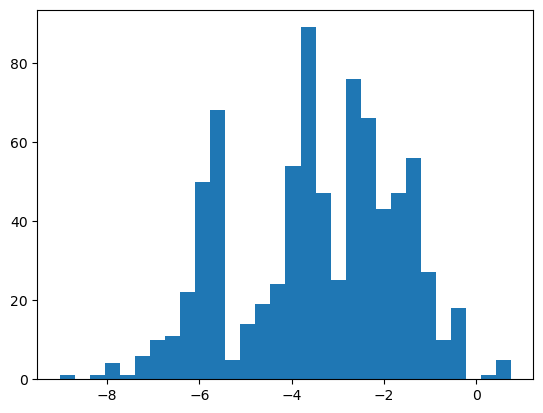

In [142]:
plt.hist(to_sigma(piKDE.sigmatilde).squeeze().log().detach(), bins=30)

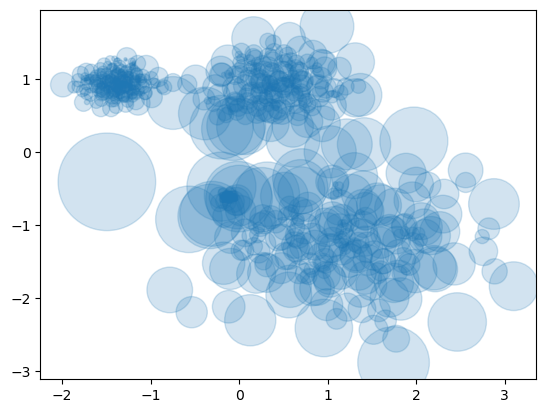

In [143]:
plt.scatter(train_data[:,0], train_data[:,1], label='kernel centers', s=4000*to_sigma(adaptiveKDE.sigmatilde)[0], alpha=0.2)

In [40]:
to_sigma(adaptiveKDE.sigmatilde)[0,:,0].sort(descending=True)

torch.return_types.sort(
values=tensor([1.2576e+00, 6.4353e-01, 6.3071e-01, 6.2742e-01, 6.0574e-01, 6.0524e-01,
        6.0317e-01, 5.9977e-01, 5.9833e-01, 5.9505e-01, 5.9436e-01, 5.8805e-01,
        5.8141e-01, 5.7664e-01, 5.6297e-01, 5.5892e-01, 5.5681e-01, 5.5287e-01,
        5.1346e-01, 5.0847e-01, 4.9770e-01, 4.8688e-01, 4.6699e-01, 4.3850e-01,
        4.2761e-01, 4.1710e-01, 3.8455e-01, 3.7382e-01, 3.7000e-01, 3.6212e-01,
        3.6170e-01, 3.5975e-01, 3.5852e-01, 3.4411e-01, 3.2440e-01, 2.9754e-01,
        2.9029e-01, 2.7713e-01, 2.7227e-01, 2.5719e-01, 2.5569e-01, 2.5481e-01,
        2.4666e-01, 2.4556e-01, 2.3923e-01, 2.3474e-01, 2.3165e-01, 2.3159e-01,
        2.3151e-01, 2.3032e-01, 2.3027e-01, 2.2961e-01, 2.2850e-01, 2.2559e-01,
        2.1792e-01, 2.1789e-01, 2.0972e-01, 2.0914e-01, 2.0810e-01, 2.0066e-01,
        1.9989e-01, 1.9924e-01, 1.9900e-01, 1.9223e-01, 1.8800e-01, 1.8686e-01,
        1.8401e-01, 1.8388e-01, 1.7960e-01, 1.7958e-01, 1.7891e-01, 1.7062e-01,
        

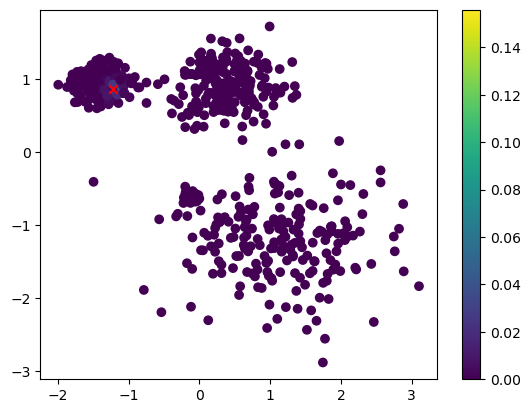

In [90]:
plt.scatter(train_data[:,0], train_data[:,1], label='kernel centers', c=resp)
plt.colorbar()
plt.scatter(test_data[test_data_idx,0], test_data[test_data_idx,1], label='test data', c='r', marker='x')

In [42]:
miss_idx = torch.rand(test_data.size())<0.3
test_data_miss = test_data.clone()
test_data_miss[miss_idx] = torch.nan

In [43]:
test_data[[test_data_idx]]

tensor([[-1.2142,  0.8634]])

In [44]:
test_data_miss[[test_data_idx]]

tensor([[-1.2142,     nan]])

In [45]:
adaptiveKDE.impute(test_data_miss[[test_data_idx]], num_steps=2000)

tensor([[-1.2142,  1.1448]])

pi-KDE

In [144]:
piKDE = PiKernelDensityEstimator(mu=train_data,sigma=10)

In [145]:
to_pi(piKDE.pitilde)

tensor([[0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
         0.0012, 0.0012, 0.0

In [146]:
piKDE.train(train_data, modified_em=True, verbose=True, verbose_freq=1, leave_one_out=True)

Iteration: 1, Objective Value: -3.62762
Iteration: 2, Objective Value: -3.32785
Iteration: 3, Objective Value: -3.07984
Iteration: 4, Objective Value: -2.72823
Iteration: 5, Objective Value: -2.41644
Iteration: 6, Objective Value: -2.12356
Iteration: 7, Objective Value: -1.77351
Iteration: 8, Objective Value: -1.46302
Iteration: 9, Objective Value: -1.38455
Iteration: 10, Objective Value: -1.35899
Iteration: 11, Objective Value: -1.34673
Iteration: 12, Objective Value: -1.33912
Iteration: 13, Objective Value: -1.33364
Iteration: 14, Objective Value: -1.32939
Iteration: 15, Objective Value: -1.32598
Iteration: 16, Objective Value: -1.32318
Iteration: 17, Objective Value: -1.32081
Iteration: 18, Objective Value: -1.31863
Iteration: 19, Objective Value: -1.31625
Iteration: 20, Objective Value: -1.31348
Iteration: 21, Objective Value: -1.31082
Iteration: 22, Objective Value: -1.30877
Iteration: 23, Objective Value: -1.30709
Iteration: 24, Objective Value: -1.30540
Iteration: 25, Objective 

In [147]:
samples = piKDE.sample(num_samples=train_data.shape[0]).detach()

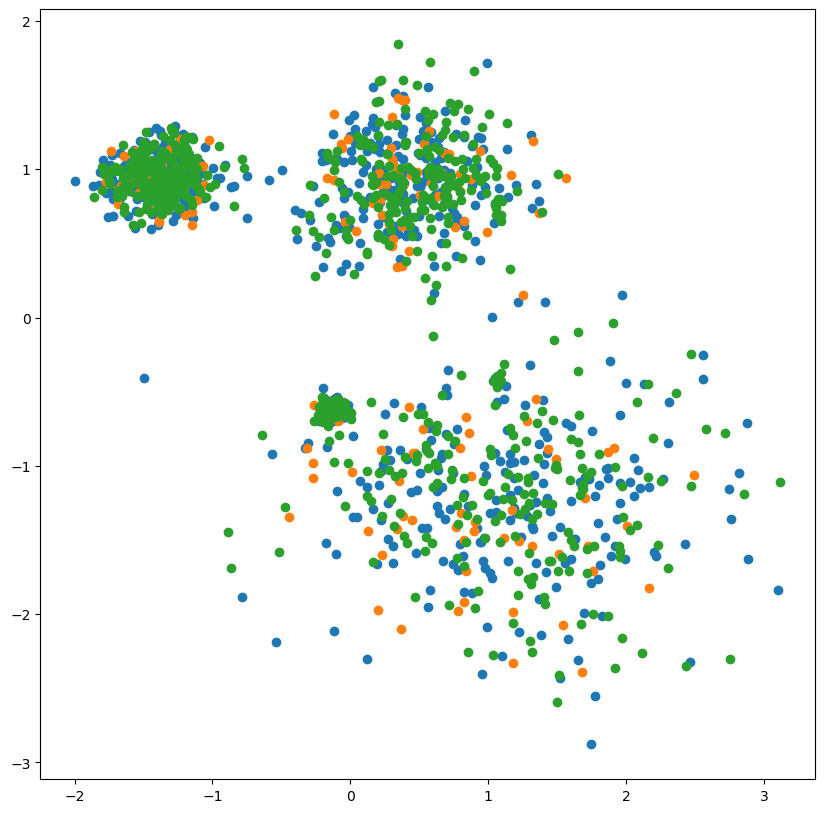

In [148]:
#plot the samples and the data
plt.figure(figsize=(10,10))
plt.scatter(train_data[:,0], train_data[:,1], label='train data')
plt.scatter(test_data[:,0], test_data[:,1], label='test data')
plt.scatter(samples[:,0], samples[:,1], label='samples')

In [149]:
test_data_idx = 5
resp = piKDE.expectation_step(test_data[[test_data_idx]])[0]

(array([ 1.,  0.,  1.,  4.,  1.,  6., 10., 11., 22., 50., 68.,  5., 14.,
        19., 24., 54., 89., 47., 25., 76., 66., 43., 47., 56., 27., 10.,
        18.,  0.,  1.,  5.]),
 array([-9.019206  , -8.693455  , -8.367703  , -8.041952  , -7.716201  ,
        -7.3904495 , -7.064698  , -6.738947  , -6.4131956 , -6.0874443 ,
        -5.761693  , -5.435941  , -5.11019   , -4.7844386 , -4.4586873 ,
        -4.132936  , -3.8071847 , -3.4814334 , -3.155682  , -2.8299308 ,
        -2.5041795 , -2.1784282 , -1.8526769 , -1.5269254 , -1.2011741 ,
        -0.87542284, -0.54967153, -0.22392018,  0.10183115,  0.42758247,
         0.7533338 ], dtype=float32),
 <BarContainer object of 30 artists>)

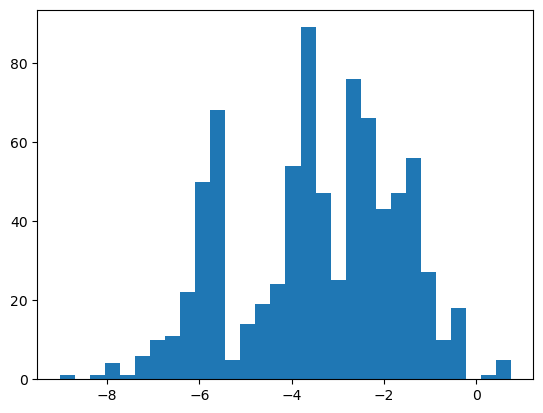

In [150]:
plt.hist(to_sigma(piKDE.sigmatilde).squeeze().log().detach(), bins=30)

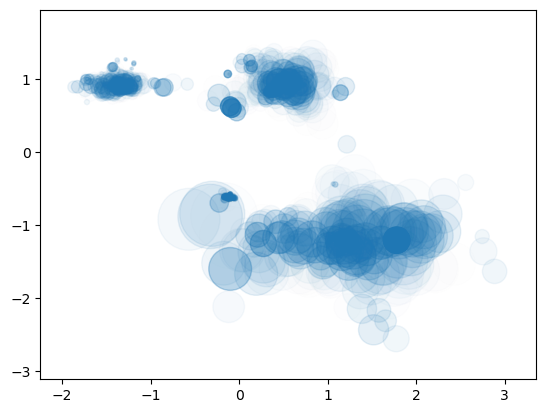

In [151]:
with torch.no_grad():
    plt.scatter(train_data[:,0], train_data[:,1], label='kernel centers', s=4000*to_sigma(piKDE.sigmatilde)[0], alpha=to_pi(piKDE.pitilde)/to_pi(piKDE.pitilde).max())

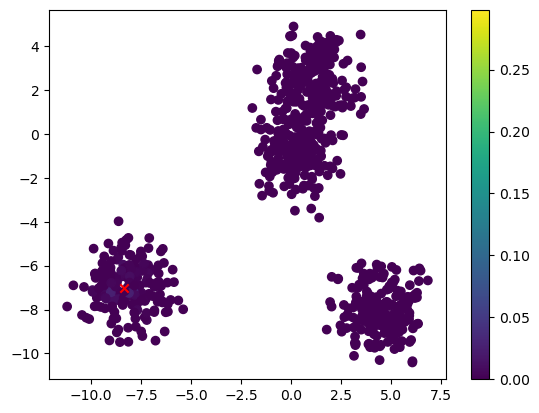

In [16]:
plt.scatter(train_data[:,0], train_data[:,1], label='kernel centers', c=resp)
plt.colorbar()
plt.scatter(test_data[test_data_idx,0], test_data[test_data_idx,1], label='test data', c='r', marker='x')

In [167]:
adaptiveKDE.impute(test_data_miss[[test_data_idx]], num_steps=2000)

tensor([[-8.3437, -6.4562]])

In [26]:
from comparison import *
import seaborn as sns

In [58]:
sample_test = "energy"
model_scores, base_scores = sample_comparison(model_samples=samples, train_samples=train_data, test_samples=test_data, test=sample_test, subsample_ratio=0.2, mc_runs=1000)

In [56]:
model_test = "mean"
model_score = model_comparison(model_scores=model_scores, base_scores=base_scores, test=model_test)

[]

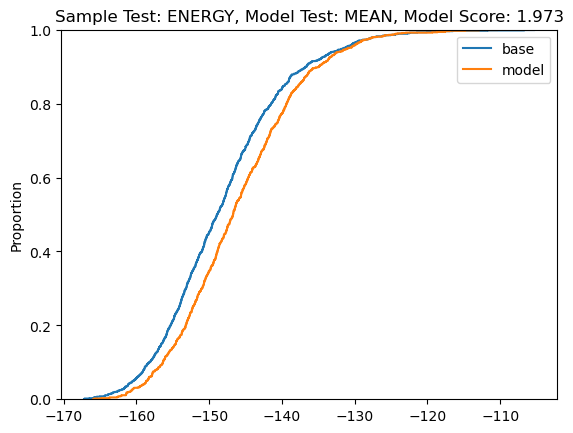

In [57]:
sns.ecdfplot(base_scores, label='base')
sns.ecdfplot(model_scores, label='model')
plt.legend()
plt.title(f"Sample Test: {sample_test.upper()}, Model Test: {model_test.upper()}, Model Score: {model_score:.3f}")
plt.plot()